# Cross-Country Comparison: Benin, Togo, Sierra Leone
Objective: Compare solar potential across Benin, Togo, and Sierra Leone using cleaned datasets to identify key differences and inform investment decisions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
%matplotlib inline

# Load cleaned datasets
benin_path = '../data/benin_clean.csv'
togo_path = '../data/togo_clean.csv'
sierra_leone_path = '../data/sierraleone_clean.csv'

df_benin = pd.read_csv(benin_path)
df_togo = pd.read_csv(togo_path)
df_sierra_leone = pd.read_csv(sierra_leone_path)

# Add country identifier
df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierra_leone['Country'] = 'Sierra Leone'

# Combine datasets
df_all = pd.concat([df_benin, df_togo, df_sierra_leone], ignore_index=True)

## Metric Comparison: Boxplots of GHI, DNI, DHI
Side-by-side boxplots to compare the distribution of GHI, DNI, and DHI across Benin, Togo, and Sierra Leone.

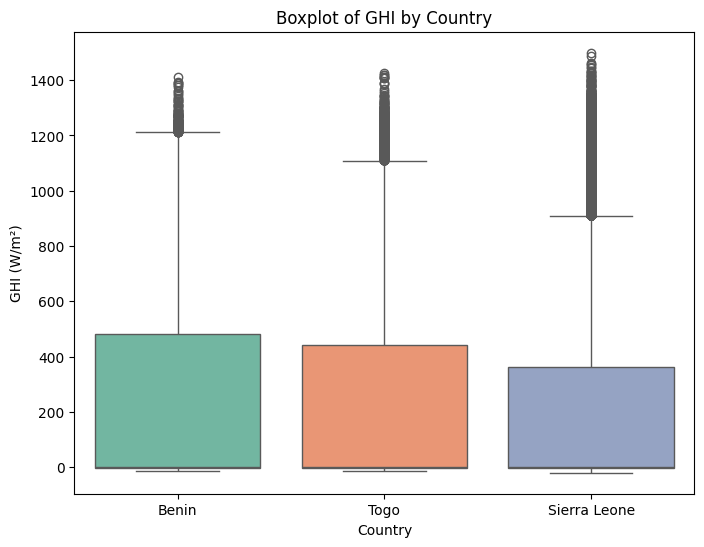

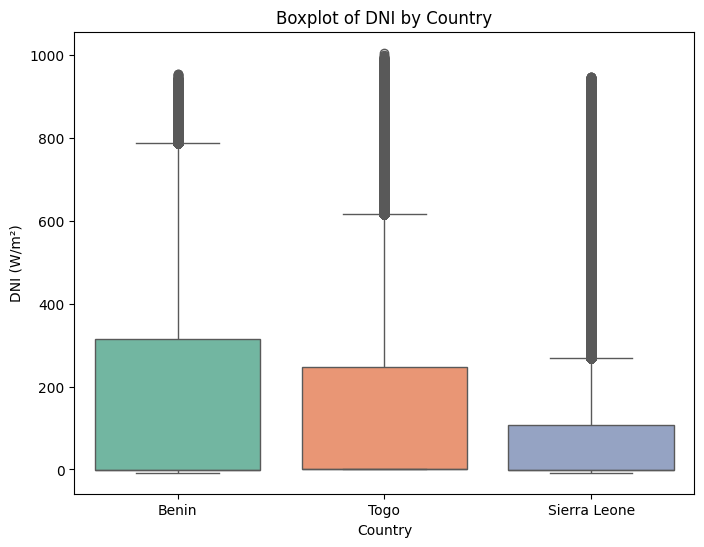

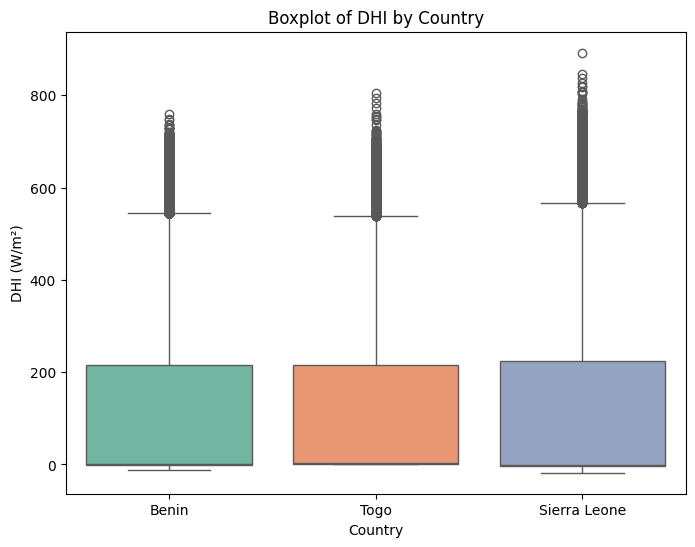

In [3]:
os.makedirs('../notebooks/figures/compared', exist_ok=True)

# Boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Country', y=metric, data=df_all, hue='Country', palette='Set2', legend=False)
    plt.title(f'Boxplot of {metric} by Country')
    plt.xlabel('Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.savefig(f'../notebooks/figures/compared/boxplot_{metric.lower()}_comparison.png')
    plt.show()

## Summary Table: Mean, Median, and Standard Deviation
Table comparing mean, median, and standard deviation of GHI, DNI, and DHI across countries.

In [4]:
# Summary statistics table
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary = summary.T  # Transpose for better readability
print(summary)

# Save table for reference
os.makedirs('../data', exist_ok=True)
summary.to_csv('../data/summary_stats.csv')

Country      Benin  Sierra Leone    Togo
GHI mean    240.56        201.96  230.56
    median    1.80          0.30    2.10
    std     331.13        298.50  322.53
DNI mean    167.19        116.38  151.26
    median   -0.10         -0.10    0.00
    std     261.71        218.65  250.96
DHI mean    115.36        113.72  116.44
    median    1.60         -0.10    2.50
    std     158.69        158.95  156.52


## Statistical Testing: Kruskal-Wallis Test on GHI
Testing whether GHI distributions differ significantly between Benin, Togo, and Sierra Leone.

In [5]:
# Kruskal-Wallis test on GHI
ghi_benin = df_benin['GHI']
ghi_togo = df_togo['GHI']
ghi_sierra_leone = df_sierra_leone['GHI']

stat, p_value = stats.kruskal(ghi_benin, ghi_togo, ghi_sierra_leone)
print(f"Kruskal-Wallis Test for GHI: Statistic = {stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in GHI between countries (p < 0.05).")
else:
    print("No significant difference in GHI between countries (p >= 0.05).")

Kruskal-Wallis Test for GHI: Statistic = 4524.88, p-value = 0.0000
Significant difference in GHI between countries (p < 0.05).
